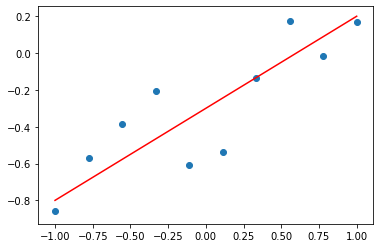

In [2]:
import matplotlib.pyplot as plt
import math
from scipy.stats import norm
import numpy as np
from scipy.stats import multivariate_normal
import seaborn as sns
import random 


x=np.linspace(-1,1,10)
def dataset():
    y=0.5*x-0.3
    t=y+np.random.normal(0,0.2,10)
    return t


sample_pts=dataset()
plt.scatter(x, sample_pts)
plt.plot(x, 0.5 * x-0.3, c="red")

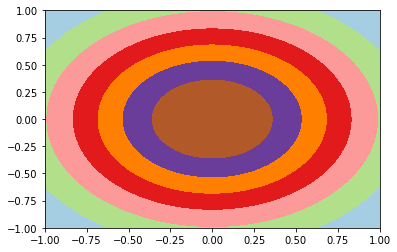

In [3]:
def line(x, w0, w1):
    return w0 + w1*x
    
def gaussian(y, x, w0, w1):
    k = math.sqrt(np.pi * 2) * 0.2
    p=k * np.exp(-0.5 * ((y - line(x, w0, w1))/0.2) ** 2)
    return p;

def posteriori(s0, m0, fi, beta, t):
    s0inv = np.linalg.inv(s0)
    sN = np.linalg.inv(s0inv + beta * fi.T@fi)
    inner_term = s0inv@(m0.reshape((2, 1))) + beta * fi.T * t
    mN = sN@inner_term
    return mN.reshape((1, 2))[0], sN

w0, w1 = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
prior_grd = multivariate_normal([0, 0], [[0.5, 0], [0, 0.5]])
plt.contourf(w0, w1, prior_grd.pdf(np.dstack((w0, w1))), cmap="Paired")

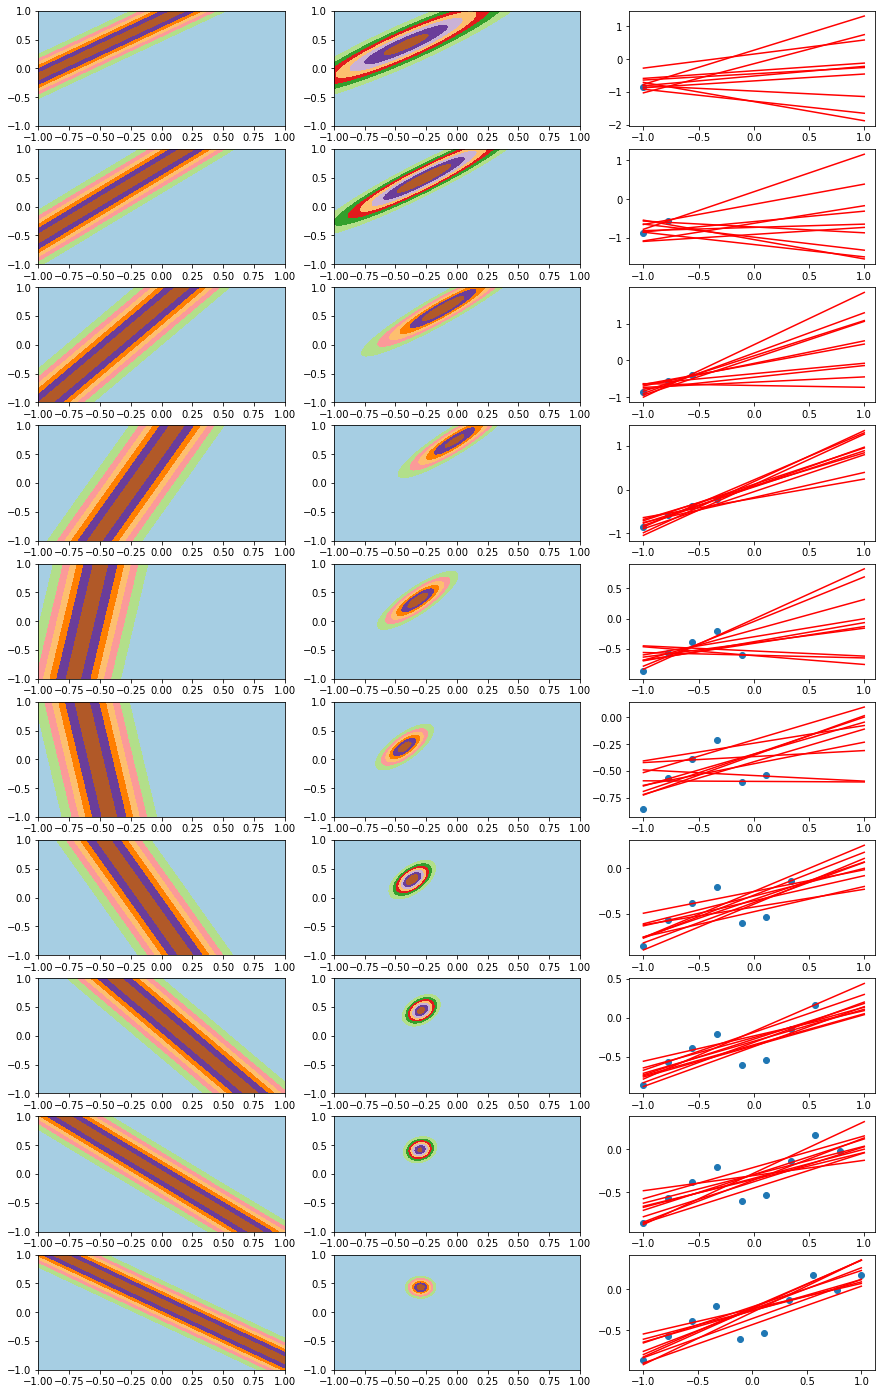

In [4]:
fig, axes = plt.subplots(10, 3, figsize=(15, 25))
count = 0
prior_grd = prior_grd.pdf(np.dstack((w0, w1)))
m0, s0 = np.array([0, 0]), np.array([[0.5, 0], [0, 0.5]])
beta = 25
new_x, new_y = [], []

for i, j in zip(x, sample_pts):
    likelihood = gaussian(j, i, w0, w1)
    posterior = prior_grd * likelihood
    prior_grd = posterior
    fi = np.array([1, i]).reshape((1, 2))
    m0, s0 = posteriori(s0, m0, fi, beta, j)
    distr = multivariate_normal.rvs(m0, s0, 10)
    new_x.append(i)
    new_y.append(j)
    
    axes[count, 0].contourf(w0, w1, likelihood, cmap="Paired")
    axes[count, 1].contourf(w0, w1, posterior, cmap="Paired")
    for l in distr:
        axes[count, 2].plot(x, l[0] + l[1] * x, c="red")
    axes[count, 2].scatter(new_x, new_y)
    count += 1

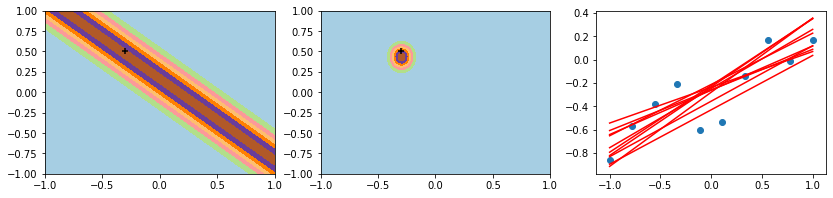

In [5]:
fig1, axes1 = plt.subplots(1, 3, figsize=(14, 3))
axes1[0].contourf(w0, w1, likelihood, cmap="Paired")
axes1[0].scatter(-0.3, 0.5, c="black", marker="+")
axes1[1].contourf(w0, w1, posterior, cmap="Paired")
axes1[1].scatter(-0.3, 0.5, c="black", marker="+")
for l in distr:
    axes1[2].plot(x, l[0] + l[1] * x, c="red")
axes1[2].scatter(new_x, new_y)